# Customer Retention Analysis in Telecommunications

## 0. Logistics

In [95]:
%pip install catboost

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from matplotlib.colors import LinearSegmentedColormap

In [97]:
# Load the dataset
df = pd.read_csv('Customer_Churn_Dataset.csv')

## Executive Summary

In the dynamic and highly competitive telecommunications industry, customer retention emerges as a critical aspect of sustainable business growth. The cost of acquiring a new customer substantially exceeds the cost of retaining an existing one. Consequently, understanding and predicting customer churn – the phenomenon where customers cease their business with a company – is paramount. This project aims to delve deep into customer behavior and service usage patterns to identify key factors contributing to customer churn.

## Business Understanding

### Problem Statement

The telecommunications industry is characterized by high customer churn rates. A sizeable portion of customers routinely switch service providers, lured by competitive offers and perceived better service quality. This churn not only leads to direct revenue loss but also incurs additional costs in marketing and new customer acquisition. The challenge lies in accurately predicting which customers are likely to churn and understanding the underlying reasons for their departure. By addressing these challenges, the company can develop more effective retention strategies.

### Objectives

**Churn Prediction:** To develop a predictive model that accurately identifies customers at high risk of churning. This model will aid in proactive intervention strategies.

**Insight Generation:** To unearth key insights from customer data that inform about churn drivers. Understanding these drivers enables the company to tailor its customer engagement and retention strategies effectively.

**Retention Strategy Formulation:** To recommend actionable strategies based on predictive model insights for reducing churn rate. These strategies might include personalized offers, service improvements, or targeted communication plans.

### Scope
The analysis will focus on historical customer data, encompassing demographics, service usage patterns, billing information, and churn status. The scope includes:

*   Comprehensive data exploration to identify trends and patterns associated with churn.
*   Application of machine learning techniques for churn prediction.
*   Evaluation of model performance and interpretation of results to drive decision-making.
*   Development of customer-centric strategies for enhancing satisfaction and loyalty.

### Expected Outcomes

The successful execution of this project is expected to:

*   Enhance the company’s understanding of customer churn dynamics.
*   Provide a robust predictive tool for early identification of at-risk customers.
*   Enable the formulation of focused and efficient customer retention programs.

Ultimately, contribute to improved customer loyalty and reduced churn rates, leading to sustained revenue growth and a stronger market position.

## Data Understanding

The Data Understanding phase is pivotal in any data science project, especially in the context of customer churn analysis in telecommunications. This phase involves an in-depth exploration of the available data to garner insights into customer behaviors, preferences, and service usage patterns. Understanding these facets is essential to identify potential churn drivers.

**Data Overview**
The dataset typically encompasses various dimensions of customer information, including:

1. **Demographics:** Age, gender, geographic location, and other personal attributes.

2. **Account Information:** Tenure with the company, contract type, payment method, and billing information.

3. **Service Usage:** Details about the services used by the customer, like phone service, internet service, additional services (online security, streaming TV, etc.).

4. **Churn Label:** The target variable indicating whether the customer has churned.

**Data Exploration Goals**
1. **Descriptive Analysis:** Understand the basic properties of the dataset, including data types, missing values, and summary statistics.

2. **Distribution of Key Features:** Analyze the distribution of crucial features like tenure, service types, and monthly charges. Identify any apparent trends or outliers.

3. **Churn Rate Analysis:** Calculate the overall churn rate and explore how it varies across different customer segments (e.g., by demographics or service usage).

4. **Correlation Analysis:** Investigate the relationships between different features, especially how they relate to the churn label. This analysis helps in identifying potential predictors for churn.

5. **Preliminary Insights:** Identify any initial patterns or insights that could be indicative of churn reasons. For instance, higher churn rates in specific demographic groups or service plans.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
        SeniorCitizen       tenure  MonthlyCharges
 count    7043.000000  7043.000000     7043.000000
 mean        0.162147    32.371149       64.761692
 std         0.368612    24.559481       30.090047
 min         0.000000     0.000000       18.250000
 25%         0.000000     9.000000       35.500000
 50%         0.000000    29.000000       70.350000
 75%         0.000000    55.000000       89.850000
 max         1.000000    72.000000      118.750000,
 customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 0    73.463013
 1    26.536987
 Na

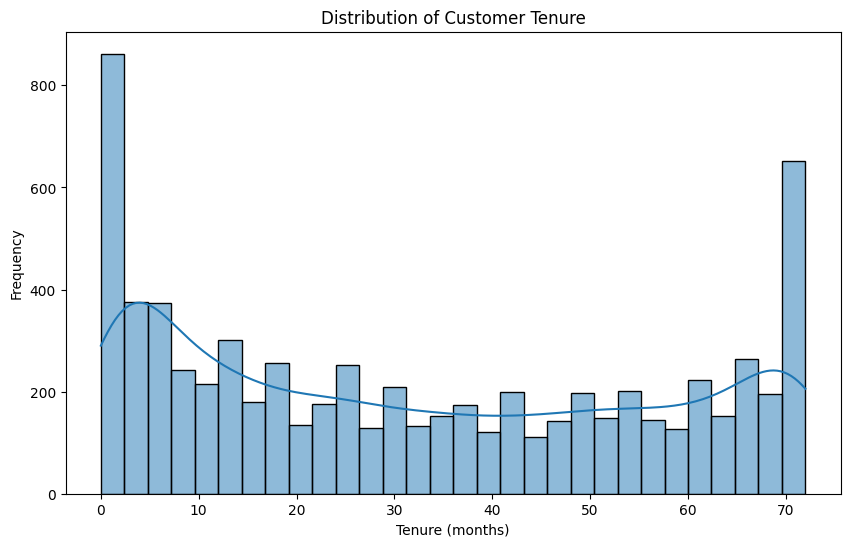

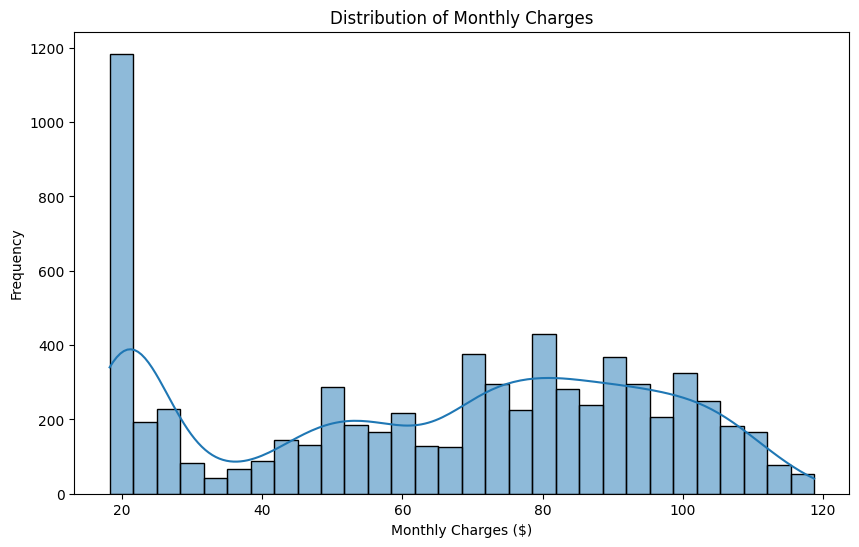

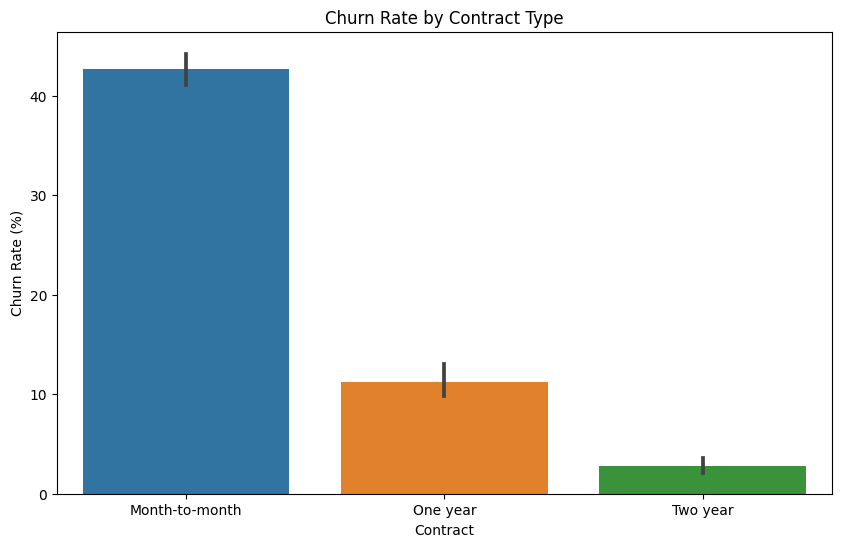

In [98]:
# Basic information about the df
df_info = df.info()
df_description = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

#Data type conversion
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Churn rate calculation
churn_rate = df['Churn'].value_counts(normalize=True) * 100

# Visualizations
# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
tenure_distribution = plt

# Distribution of Monthly Charges
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
monthly_charges_distribution = plt

# Churn Rate by Contract Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', data=df, estimator=lambda x: sum(x==1)*100/len(x))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
churn_by_contract = plt

# Showing the first few rows of the dfset
df_head = df.head()

df_info, df_description, missing_values, churn_rate, df_head



Based on the analysis of the dataset, we have gleaned some initial insights:

**1. Churn Rate:**
Approximately 26.54% of the customers in the dataset have churned. This substantial churn rate underscores the urgency of identifying and addressing the factors contributing to customer turnover. It suggests that a significant portion of the customer base is at risk, necessitating focused retention strategies.

**2. Tenure Distribution:**
While the specific distribution of customer tenure is not displayed here, it is an essential factor in churn analysis. Typically, a deeper look into tenure distribution would reveal whether newly acquired customers are more prone to churn compared to those with longer tenure. If the data shows a higher churn rate among new customers, strategies could be developed to enhance early engagement and satisfaction. Conversely, if long-term customers are leaving, this might indicate issues with service evolution or changing market dynamics.

**3. Monthly Charges Distribution:**
The distribution of monthly charges would provide insights into how spending patterns are associated with churn. If higher monthly charges are linked to higher churn rates, this might indicate price sensitivity among customers. Alternatively, a uniform churn rate across different charge levels could suggest that factors other than price are influencing customer decisions to leave.

**4. Churn Rate by Contract Type:**
The churn rate varies significantly across different contract types. Customers on month-to-month contracts might exhibit a higher churn rate, suggesting a lower commitment level and possibly higher sensitivity to service issues or competitive offers. On the other hand, customers with longer-term contracts (one-year, two-year) potentially have lower churn rates, possibly due to the higher switching barriers or greater satisfaction with long-term plans. This insight is crucial for tailoring retention strategies to different customer segments based on their contract types.

In [99]:
# Identifying categorical columns
# We consider a column to be categorical if it is of type object and has a limited number of unique values

categorical_threshold = 20  # Threshold for the maximum number of unique values in a categorical column
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if df[col].nunique() <= categorical_threshold]

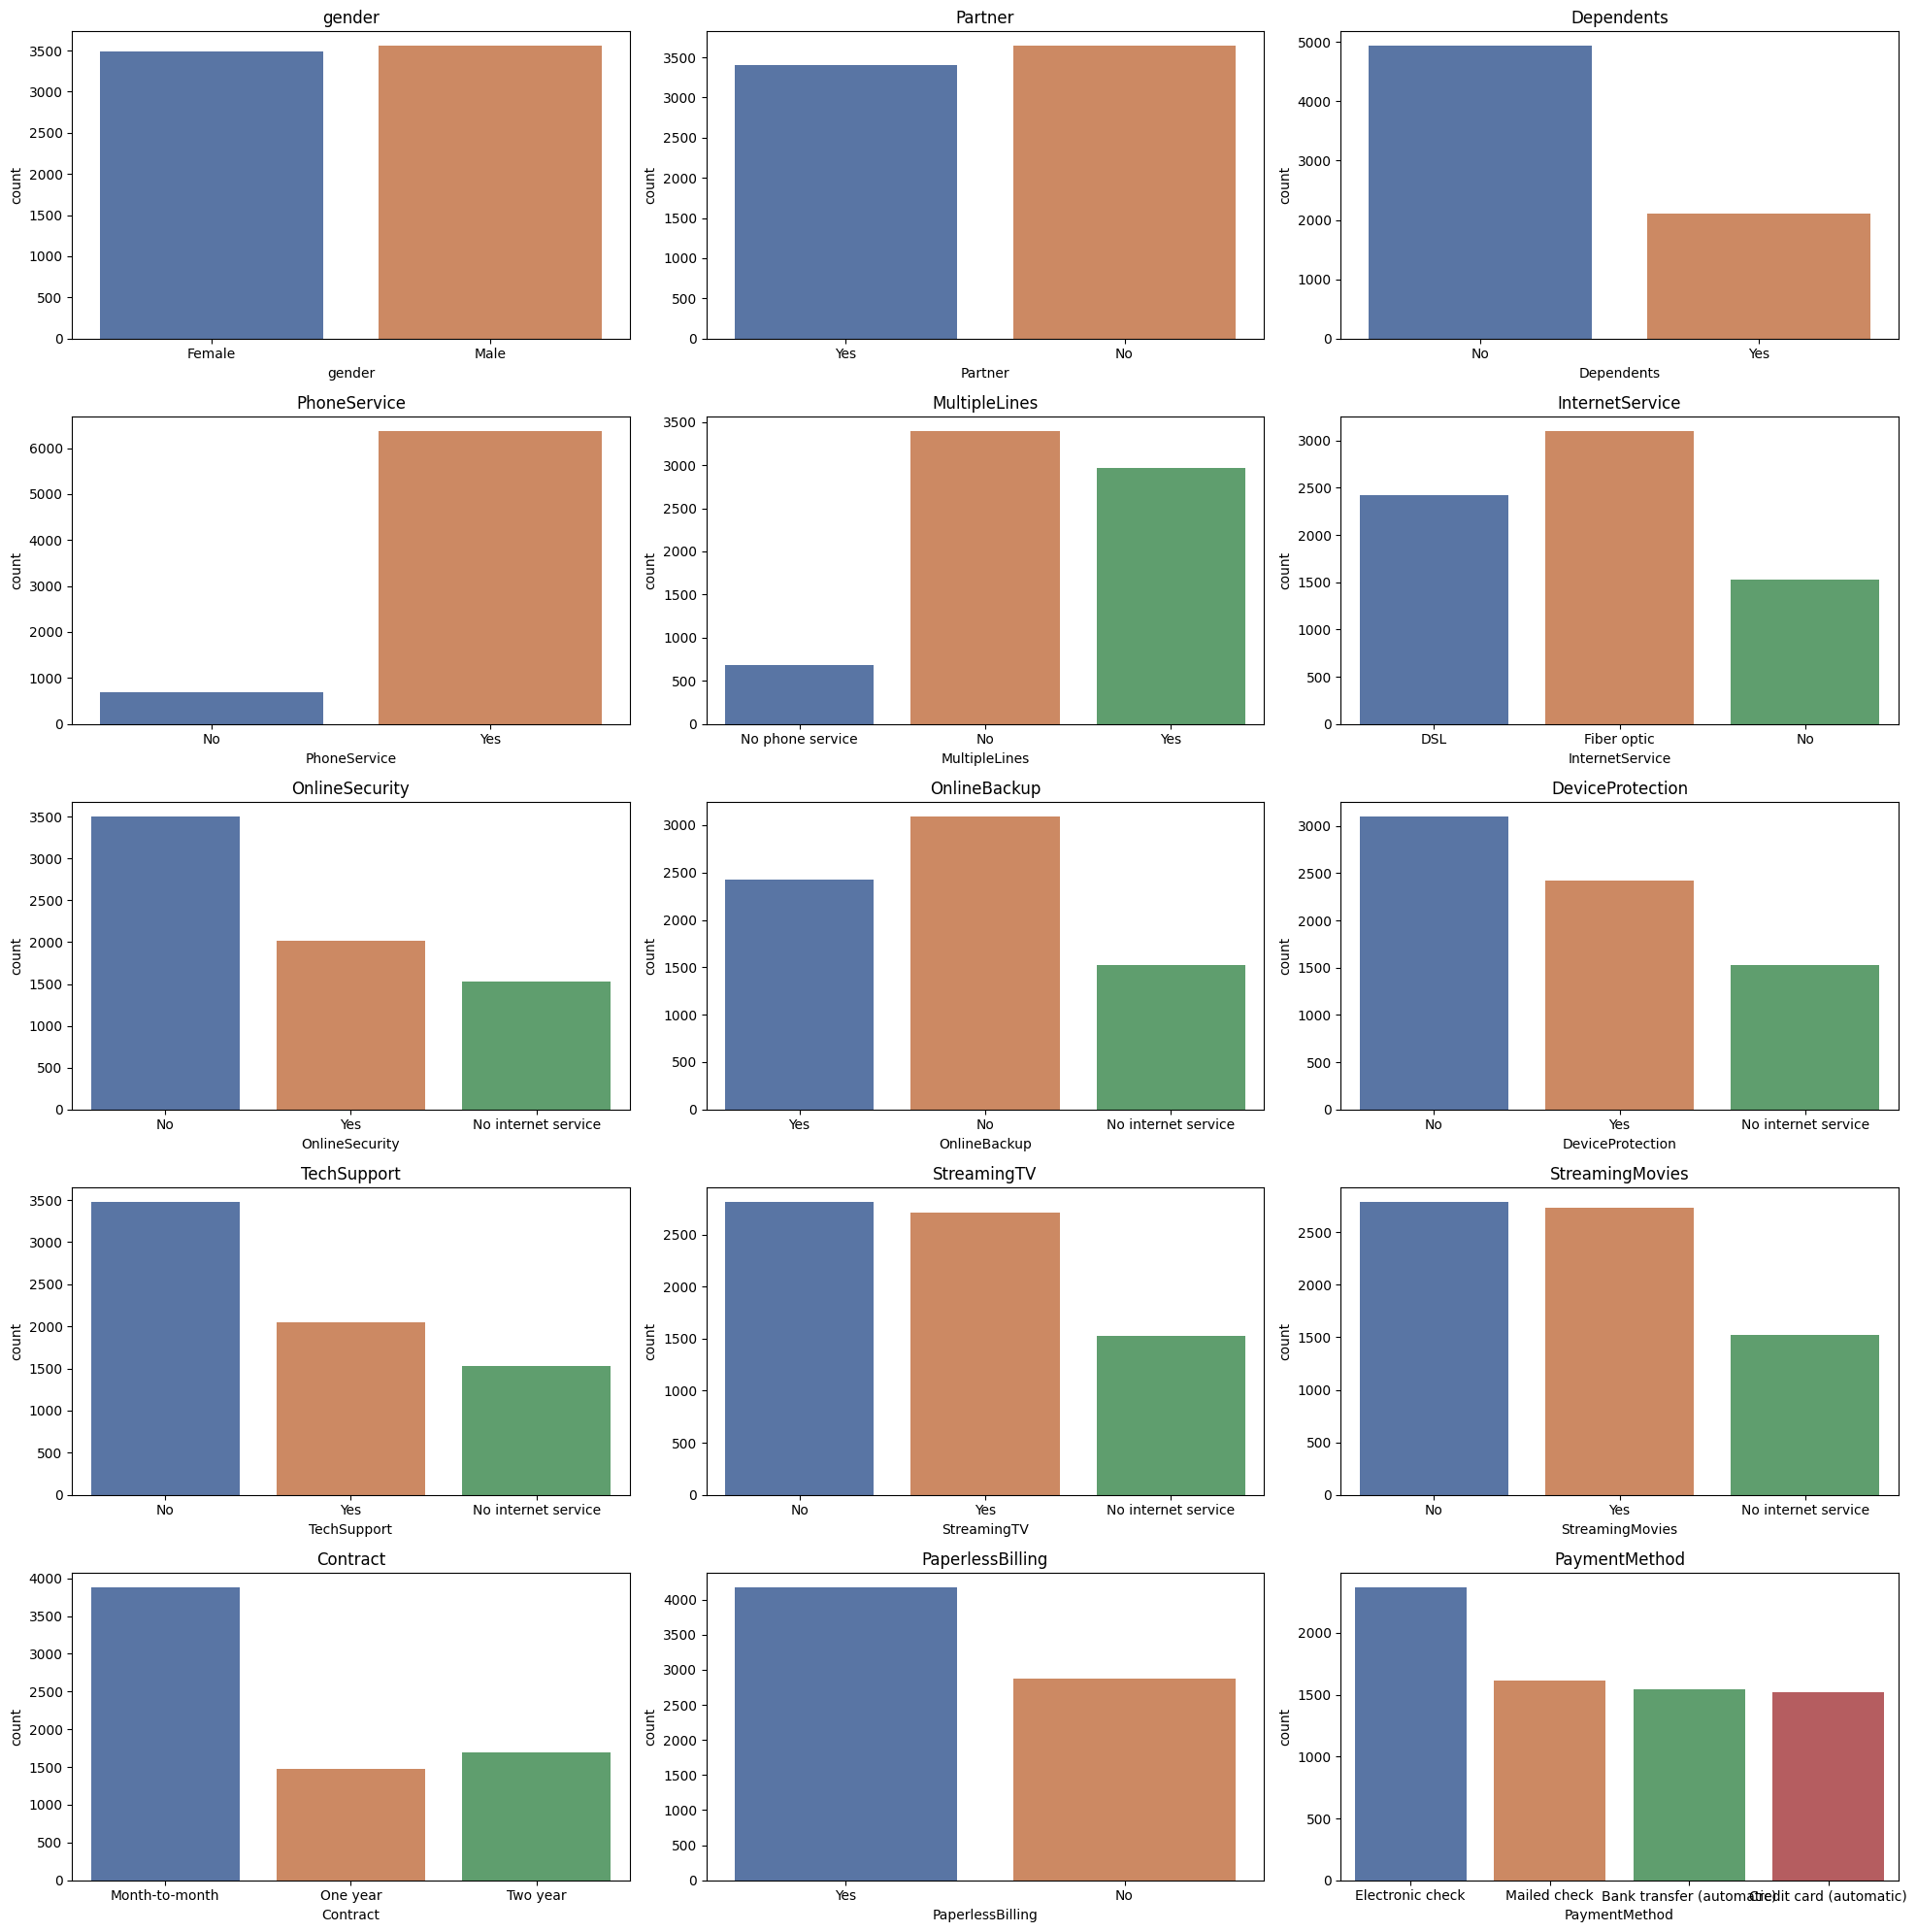

In [100]:
# Countplot of Categorical Columns
n_cols = 3
n_rows = len(cat_cols) // n_cols + (1 if len(cat_cols) % n_cols > 0 else 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

for i, column in enumerate(cat_cols):
    row_index = i // n_cols
    col_index = i % n_cols

    sns.countplot(x=df[column], ax=axs[row_index, col_index], palette="deep")
    axs[row_index, col_index].set_title(f"{column}")

# Remove any unused subplots
for i in range(len(cat_cols), n_cols * n_rows):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


Based on the count plots for each categorical column in our dataset, here are some deductions:

**1. Gender:** The distribution between male and female customers is almost equal, suggesting a balanced gender representation among customers.

**2. Partner and Dependents:** A larger proportion of customers do not have a partner or dependents. This could indicate that a significant segment of the customer base might be single or without children.

**3. Phone Service:** The vast majority of customers have phone service, indicating that it is a popular service among the customer base.

**4. Multiple Lines:** There is a relatively even distribution between customers having multiple lines and not having them. A significant portion also falls under the 'No phone service' category, aligning with those who do not have phone service.

**5. Internet Service:** There is a notable preference for Fiber optic and DSL services, with a substantial number of customers not having internet service. The preference for Fiber optic might suggest a customer base inclined towards higher-speed internet options.

**6. Online Security, Online Backup, Device Protection, Tech Support:** For each of these services, more customers do not have the service than do. This could point to either a lack of interest or a potential opportunity for upselling these services.

**7. Streaming TV and Streaming Movies:** The numbers are relatively balanced between customers who have and do not have these services. This suggests a moderate interest in streaming services among the customer base.

**8. Contract:** Most customers are on a month-to-month contract, followed by two-year and one-year contracts. This might indicate a preference for flexibility in service commitment.

**9. Paperless Billing:** More customers prefer paperless billing, which could reflect an environmentally conscious or tech-savvy customer base.
Payment Method: The most common payment methods are Electronic check, Mailed check, Bank transfer, and Credit card. Electronic checks are slightly more prevalent.

**10. Churn:** A significant number of customers have not churned compared to those who have. This is a positive indicator of customer retention, but the churn rate still warrants attention to improve overall customer loyalty.

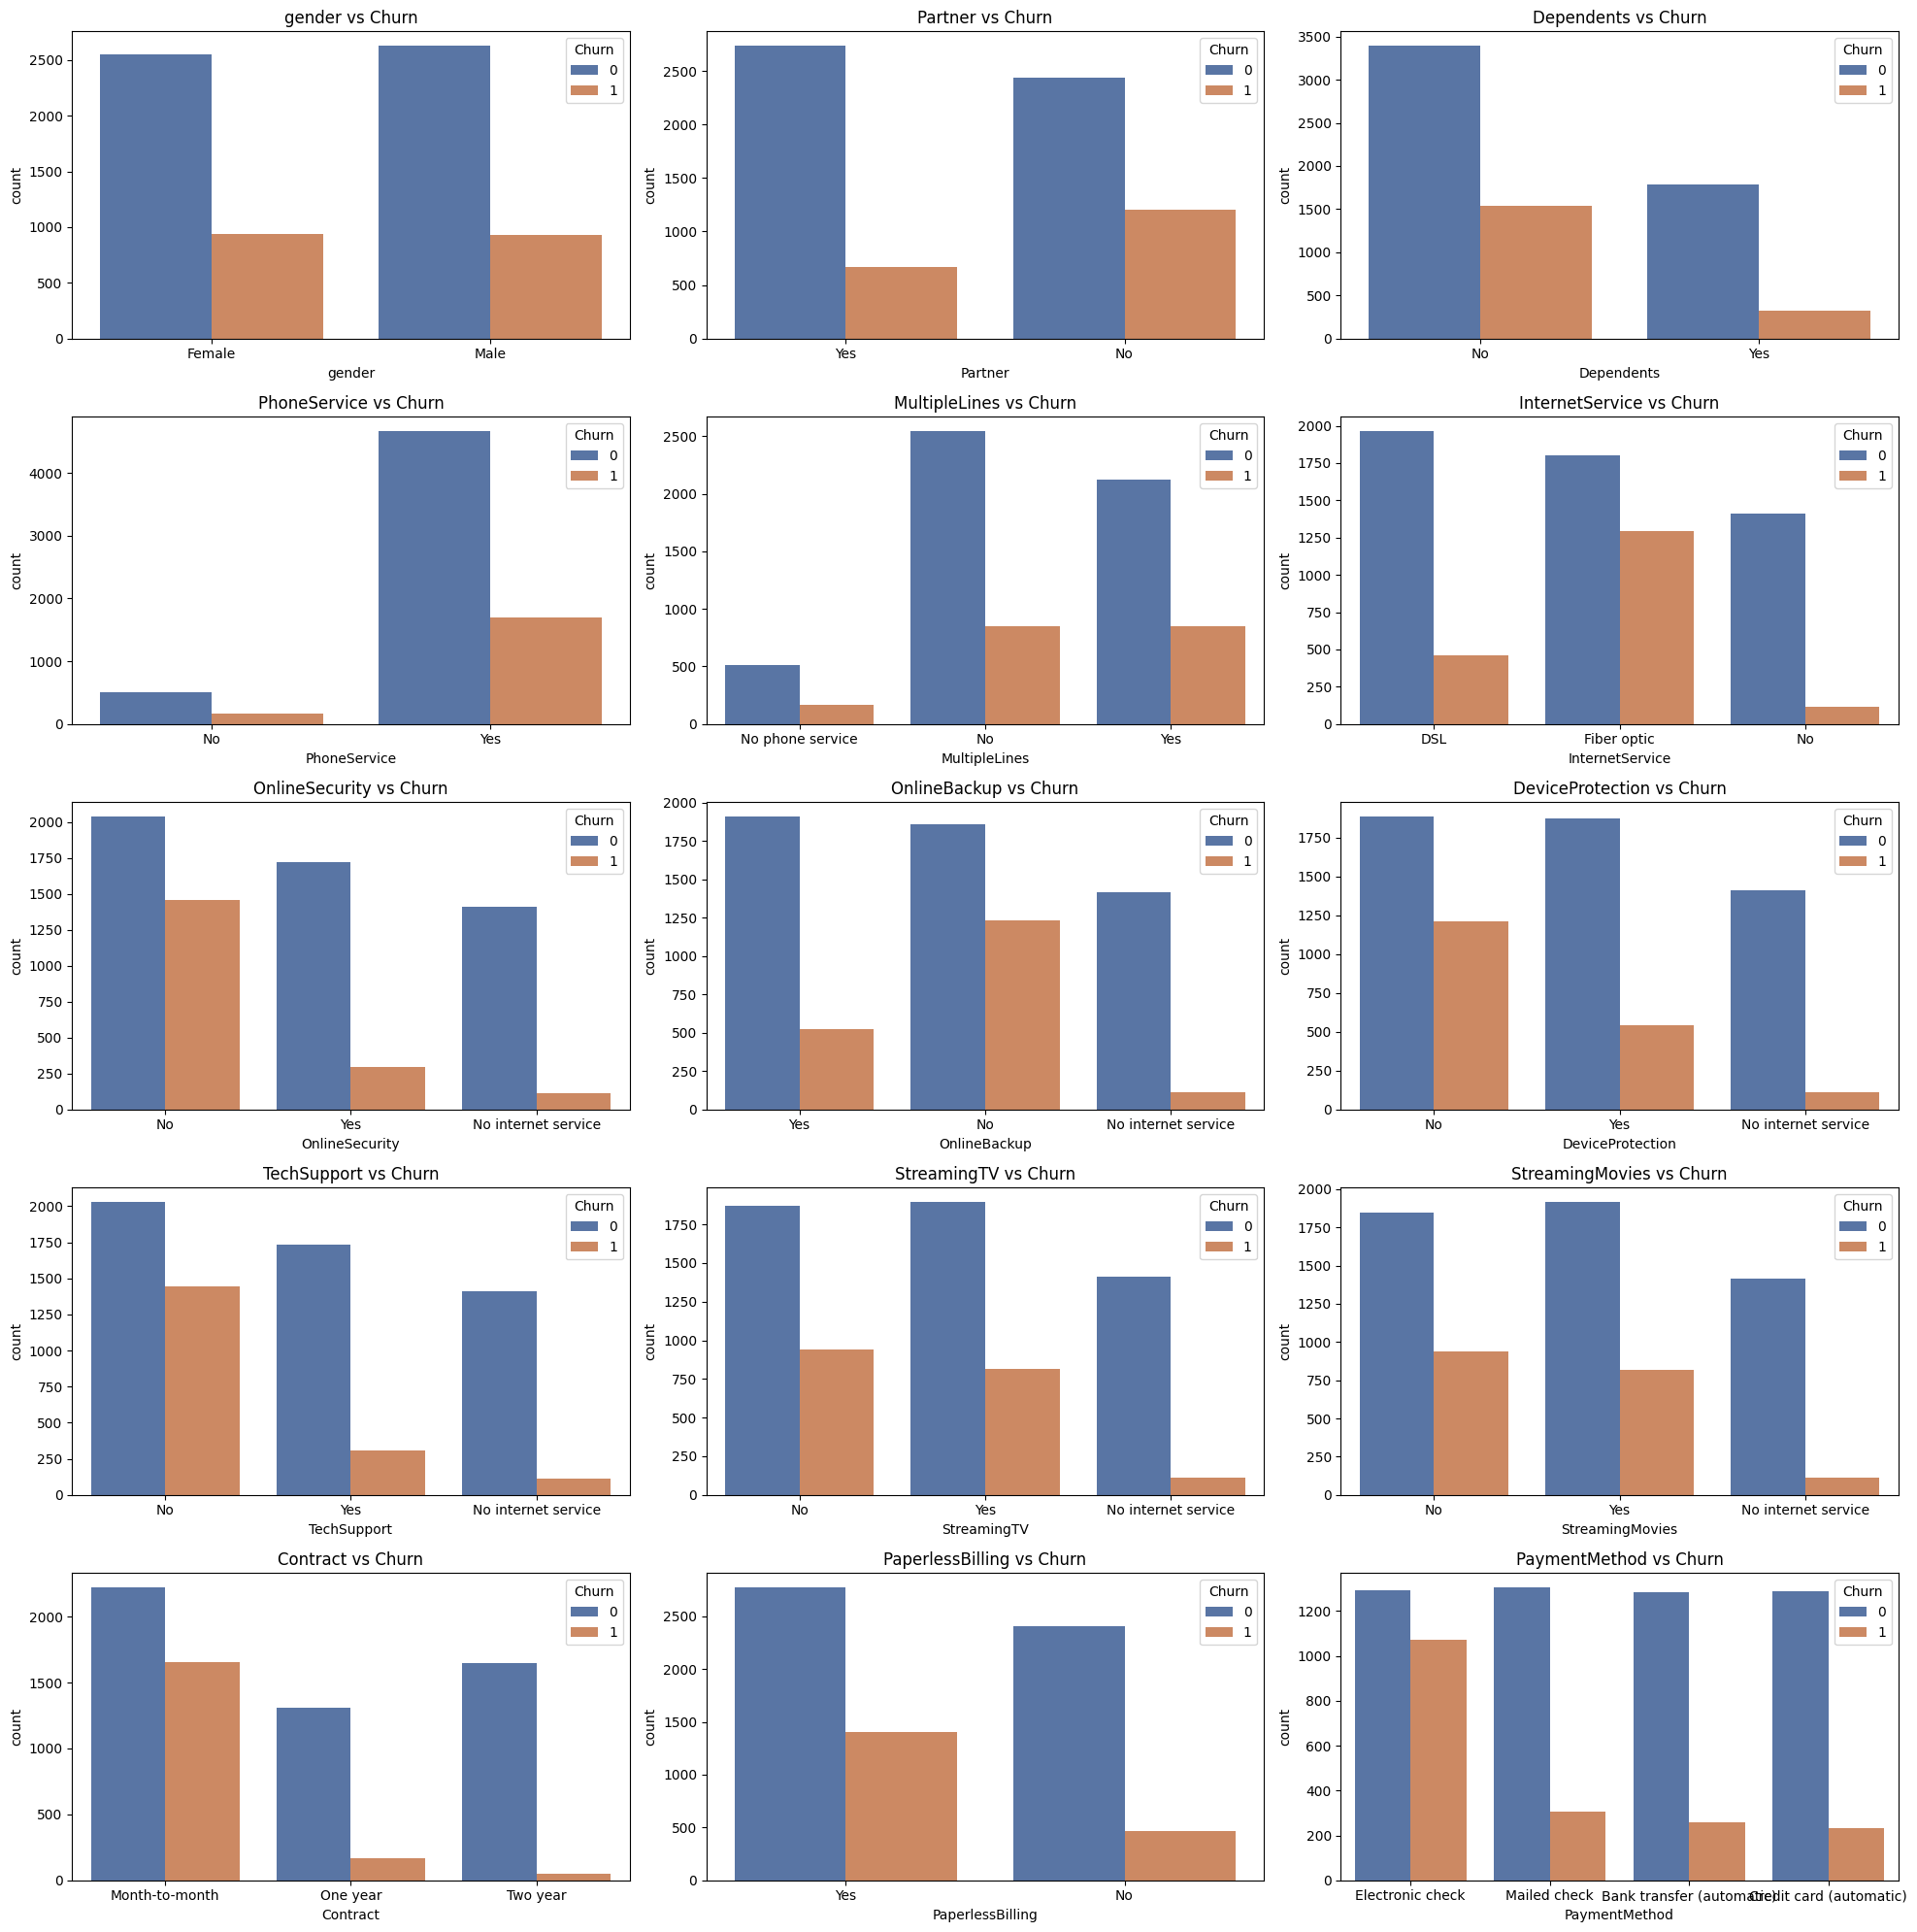

In [101]:
# Let's modify the code to see the effect of categorical variables on Churn
target = 'Churn'  # Target variable

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

for i, column in enumerate(cat_cols):
    row_index = i // n_cols
    col_index = i % n_cols

    sns.countplot(x=df[column], ax=axs[row_index, col_index], hue=df[target], palette="deep")
    axs[row_index, col_index].set_title(f"{column} vs {target}")

# Remove any unused subplots
for i in range(len(cat_cols), n_cols * n_rows):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

The modified count plots show the distribution of each categorical variable with respect to the churn. Here are some key deductions from these plots:

**1. Gender:** Churn does not seem to be significantly affected by gender; both genders show similar churn patterns.

**2. Partner and Dependents:** Customers without partners and dependents are more likely to churn. This suggests that those with family commitments might be more inclined to stay with the service.

**3. Phone Service:** Having phone service does not have a significant impact on churn, as both groups show a similar churn rate.

**4. Multiple Lines:** Customers with no multiple lines (either having a single line or no phone service) show a slightly higher propensity to churn.

**5. Internet Service:** Customers with Fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This could be due to expectations around service quality or pricing.

**6. Online Security, Online Backup, Device Protection, Tech Support:** For each of these services, customers who do not have the service are more likely to churn. This could indicate that these value-added services play a role in customer retention.

**7. Streaming TV and Streaming Movies:** Customers without these services show a higher tendency to churn, suggesting that entertainment options might be a factor in retaining customers.

**8. Contract:** Customers with month-to-month contracts are much more likely to churn compared to those with one or two-year contracts. This highlights the importance of longer-term contracts in ensuring customer loyalty.

**9. Paperless Billing:** There is a slightly higher churn rate among customers who use paperless billing. This might be related to customer demographics or payment preferences.

**10. Payment Method:** Customers who pay via electronic check are more likely to churn. This could point to a need for more convenient or reliable payment options.

**11. Churn:** As expected, this plot simply reiterates the distribution of churned versus retained customers.

Based on the count plot of the 'Churn' variable, we can conclude that the dataset is imbalanced with respect to the target variable (Churn). The plot showed a significantly higher number of customers who have not churned ('No') compared to those who have ('Yes').

In datasets with imbalanced classes, particularly in a classification context like predicting customer churn, this imbalance can lead to challenges like:

**Model Bias:** Machine learning models might become biased towards the majority class, leading to poorer performance in correctly predicting the minority class.

**Evaluation Metrics:** Standard evaluation metrics like accuracy might not be suitable for imbalanced datasets, as they can give a misleadingly high value due to the large number of majority class instances.

**Overfitting:** There's a risk that the model overfits the majority class while failing to capture the characteristics of the minority class.

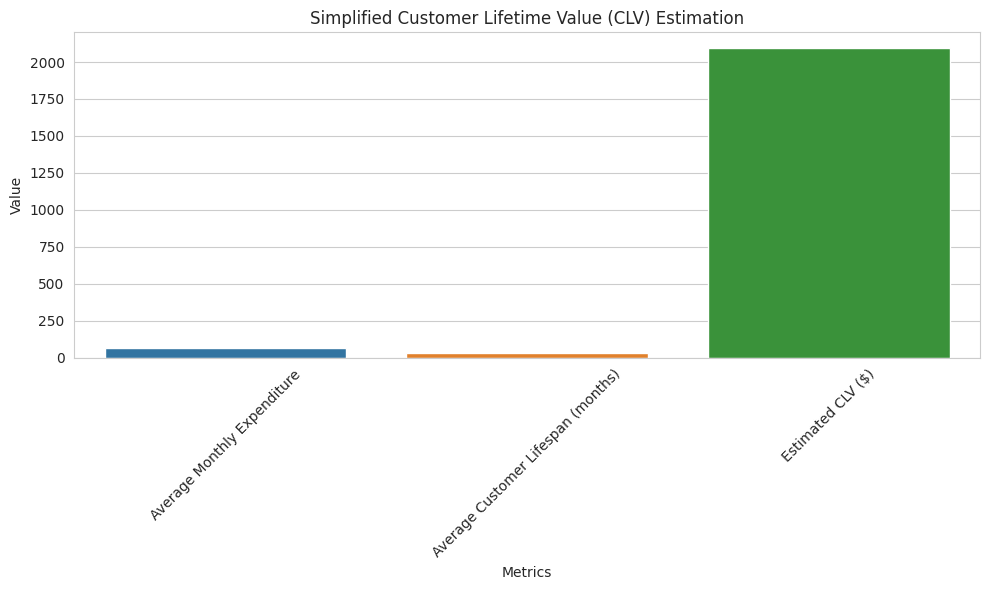

In [105]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN (as there might be some non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calculate average monthly expenditure
average_monthly_expenditure = df['MonthlyCharges'].mean()

# Calculate average customer lifespan (tenure)
average_customer_lifespan = df['tenure'].mean()

# Calculate simple CLV
simple_clv = average_monthly_expenditure * average_customer_lifespan

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Data for plotting
data_to_plot = {
    'Average Monthly Expenditure': average_monthly_expenditure,
    'Average Customer Lifespan (months)': average_customer_lifespan,
    'Estimated CLV ($)': simple_clv
}

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(data_to_plot.keys()), y=list(data_to_plot.values()))
plt.title('Simplified Customer Lifetime Value (CLV) Estimation')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

The estimated Customer Lifetime Value (CLV) based on the provided dataset is approximately $2,096.41. This calculation is derived as follows:

**Average Monthly Expenditure:** The average monthly charges per customer are approximately $64.76.

**Average Customer Lifespan:** The average tenure (lifespan) of a customer is about 32.37 months.

By multiplying the average monthly expenditure by the average customer lifespan, we obtain a simple CLV estimation. Unfortunately, this is a basic calculation and does not account for factors like discount rates, customer segments, or profit margins, which can significantly influence the true CLV.

In [47]:
l1 = [len(i.split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    df.loc[i,'TotalCharges'] = df.loc[(i-1),'TotalCharges']

df['TotalCharges'] = df['TotalCharges'].astype(float)
df.drop(columns = ['customerID'], inplace = True)
le = LabelEncoder()

df_0 = df.copy(deep=True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df_0[i] = le.fit_transform(df_0[i])
    print(i, ' : ', df_0[i].unique(), ' = ', le.inverse_transform(df_0[i].unique()))  # Added the closing parenthesis here


Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754
Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card

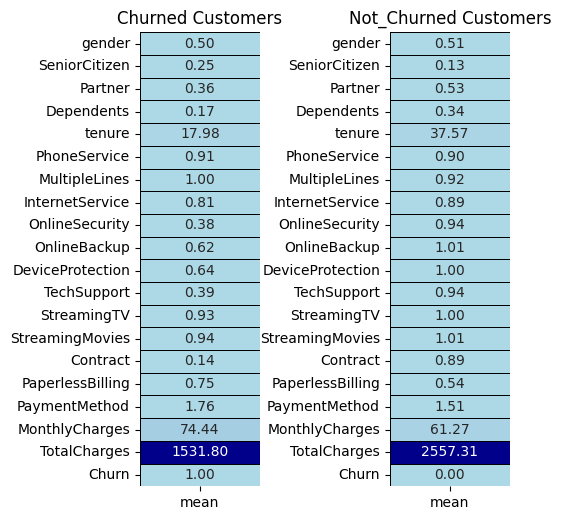

In [48]:
# Creating a custom colormap
colors = ['#ADD8E6', '#00008B']
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=256)

# Descriptive statistics for churn and not churn customers
churn = df_0[df_0['Churn'] == 1].describe().T
not_churn = df_0[df_0['Churn'] == 0].describe().T

# Setting up the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

# Heatmap for churned customers
plt.subplot(1, 2, 1)
sns.heatmap(churn[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Churned Customers');

# Heatmap for not churned customers
plt.subplot(1, 2, 2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Not_Churned Customers');

fig.tight_layout(pad=0)

<Axes: >

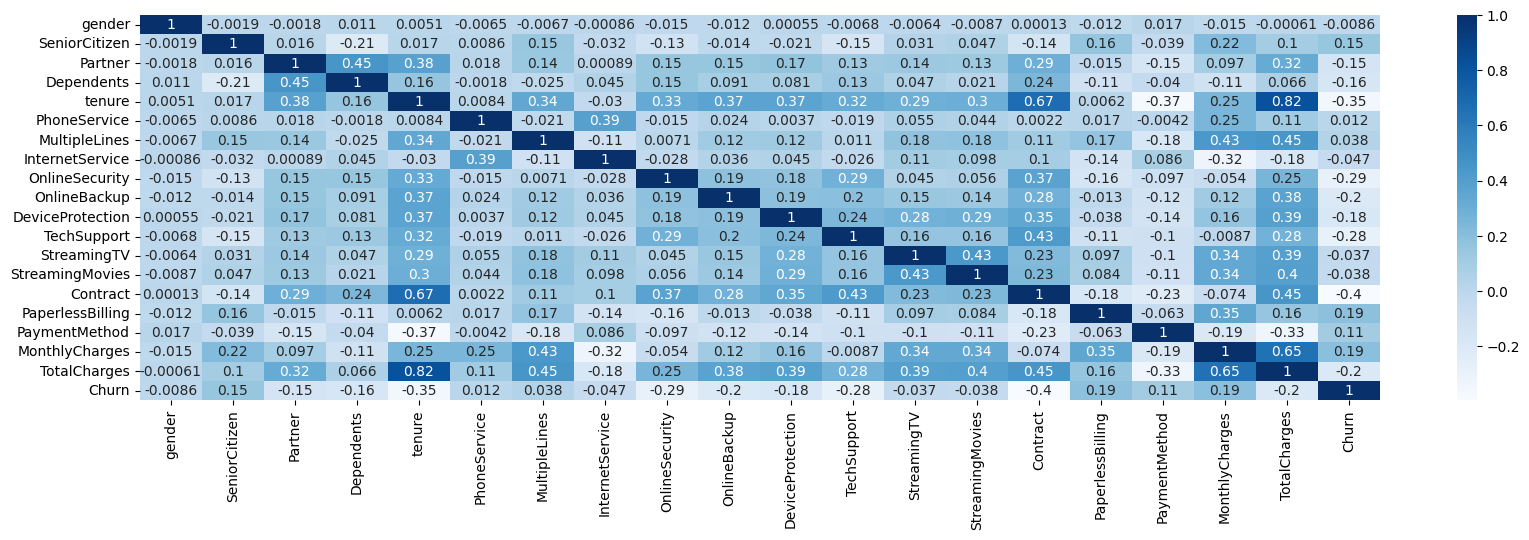

In [49]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_0.corr(numeric_only=True), cmap='Blues', annot=True)

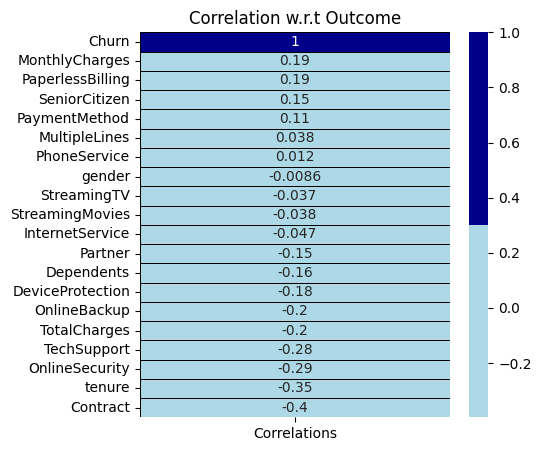

In [50]:
corr = df_0.corrwith(df_0['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation

## Data Preparation: Cleaning, Preprocessing and Feature Selection for Churn Prediction

Based on previous section, we'll need to address a few key aspects to have a consistent and relaible data:

**1. Outlier Check:** We are gonna look at whether our data include any outlier data that may affect our model negatively.

**2. Handle Missing Values:** After converting TotalCharges, we need to check for and handle any missing values in the dataset.

**3. Feature Engineering:** Based on all previous steps, we will choose our features for modelling.

### Outlier Check

In [57]:
# Identifying numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

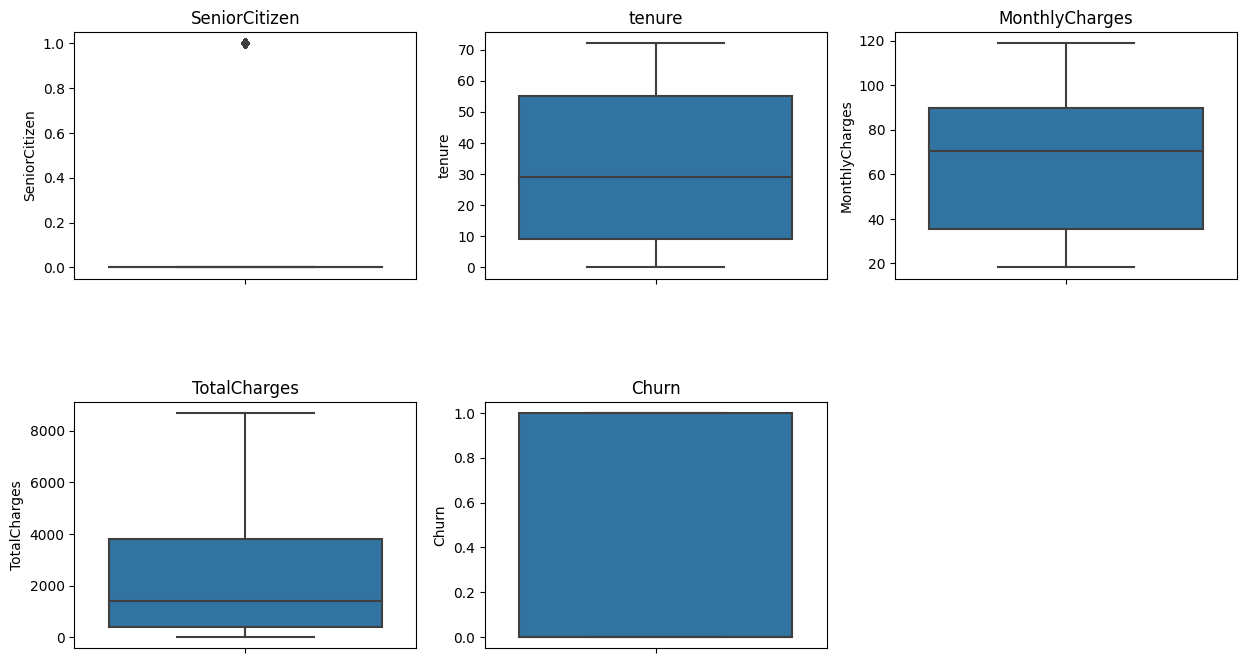

{'SeniorCitizen': (True, 1142),
 'tenure': (False, 0),
 'MonthlyCharges': (False, 0),
 'TotalCharges': (False, 0),
 'Churn': (False, 0)}

In [52]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75, iqr_multiplier=1.5):
    """
    Calculate the lower and upper threshold for outliers in a given column of a dataframe.
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + iqr_multiplier * interquantile_range
    low_limit = quartile1 - iqr_multiplier * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    """
    Check if a column in a dataframe has any outliers.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outlier_count = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].shape[0]
    return outlier_count > 0, outlier_count

def replace_with_thresholds(dataframe, variable):
    """
    Replace the outliers in a dataframe column with the calculated thresholds.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def plot_boxplot(dataframe, columns):
    """
    Plot boxplots for given columns of a dataframe to visually inspect outliers.
    """
    n_cols = 3
    n_rows = len(columns) // n_cols + (1 if len(columns) % n_cols > 0 else 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    fig.subplots_adjust(hspace=0.5)

    # Adjust for a single row of plots
    if n_rows == 1:
        axs = axs.reshape(1, -1)

    for i, col in enumerate(columns):
        row_index = i // n_cols
        col_index = i % n_cols
        sns.boxplot(y=dataframe[col], ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(col)

    # Remove unused subplots
    for i in range(len(columns), n_cols * n_rows):
        fig.delaxes(axs.flatten()[i])

    plt.show()

# Re-run the outlier check and plot box plots
outlier_results = {col: check_outlier(df, col) for col in num_cols}
plot_boxplot(df, num_cols)
outlier_results


**1. SeniorCitizen:** This column has outliers, with 1142 data points classified as such. Given the nature of this variable (likely a binary indicator for senior citizens), these "outliers" may actually be valid data points representing non-senior citizens. This suggests that the concept of outliers may not be applicable or meaningful for this particular variable.

**2. Tenure:** There are no outliers in the 'tenure' column. This indicates a relatively uniform distribution without extreme values.

**3.MonthlyCharges:** Similarly, there are no outliers in the 'MonthlyCharges' column, suggesting that charges are within a reasonable range for all customers.

### Handle Missing Values

In [58]:
df_0['TotalCharges'].fillna(df_0['TotalCharges'].mean(), inplace=True)

### Feature Engineering

Text(0.5, 1.0, 'Selection of Categorical Features')

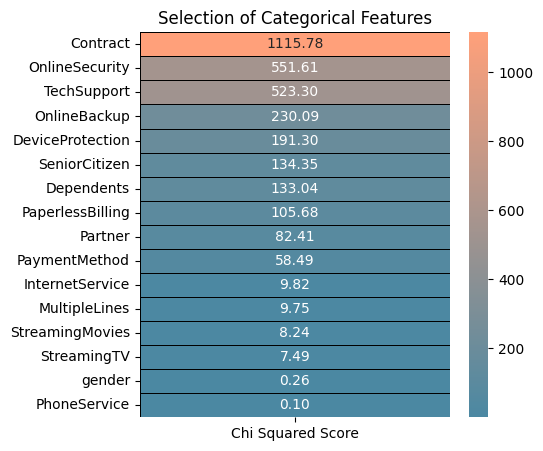

In [65]:
# Assuming these columns are categorical
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Selecting features and target from df_0
features = df_0[cat_cols]
target = df_0['Churn']

# Applying SelectKBest with the chi-square score function
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Creating a DataFrame for feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=cat_cols, columns=['Chi Squared Score'])

# Plotting the heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='Chi Squared Score', ascending=False), annot=True, cmap=cmap, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')


These scores are a measure of the independence between each feature and the target variable ('Churn' in our case). Higher scores indicate a stronger relationship with the target variable. Let's discuss the implications of these scores:

**1. Contract (1115.78):** This feature has the highest chi-squared score, indicating a strong association with the target variable. It suggests that the type of contract a customer has is significantly related to their churn status.

**2. OnlineSecurity (551.61), TechSupport (523.30):** These features also have high scores, implying they are important in predicting customer churn. It seems that services related to online security and technical support are influential in a customer's decision to stay with or leave the service.

**3. OnlineBackup (230.09), DeviceProtection (191.30):** These features have moderate scores, suggesting a lesser yet noteworthy association with churn compared to the top features.

**4. SeniorCitizen (134.35), Dependents (133.04):** These demographic features show some relationship with churn, indicating that a customer’s age group and whether they have dependents might affect their likelihood of churning.

**5. PaperlessBilling (105.68), Partner (82.41)**: These features have lower scores compared to others but still contribute to the model's understanding of churn.

**6. PaymentMethod (58.49):** This score suggests a mild association with churn, indicating the method of payment might influence churn decisions to some extent.

**7. InternetService (9.82), MultipleLines (9.75), StreamingMovies (8.24),StreamingTV (7.49):** These features have relatively low scores, suggesting a weak association with churn. Their impact might be less critical compared to other features.

**8. Gender (0.26), PhoneService (0.10):** These features have the lowest scores, implying almost no association with churn. They are likely not useful predictors in a model focused on customer churn.

In summary, features like 'Contract', 'OnlineSecurity', and 'TechSupport' are key in predicting customer churn, while features like 'Gender' and 'PhoneService' are less informative for this purpose. Let's also do the ANOVA test for numerical features.

Text(0.5, 1.0, 'Selection of Numerical Features')

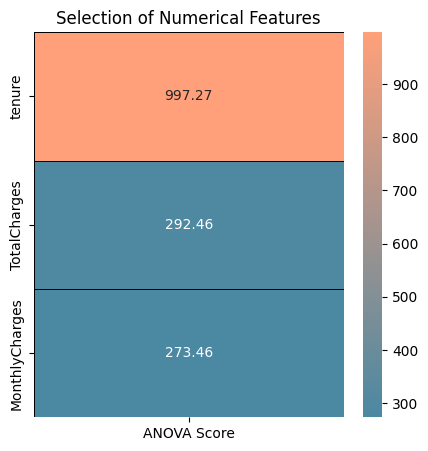

In [71]:
# Selecting numerical columns
num_cols = ["tenure", "TotalCharges", "MonthlyCharges"]

# Selecting features and target from df_0
features = df_0.loc[:, num_cols]
target = df_0.loc[:, 'Churn']

# Applying SelectKBest with the ANOVA F-test score function
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Creating a DataFrame for feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Plotting the heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='ANOVA Score', ascending=False), annot=True, cmap=cmap, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')

The ANOVA F-test scores for 'tenure', 'TotalCharges', and 'MonthlyCharges' in the dataset, with values of 997.27, 292.46, and 273.46 respectively, indicate their varying degrees of association with the target variable 'Churn'. Let's delve into each one:

**1. Tenure (997.27):** This feature has a very high score, which indicates a strong relationship with churn. The tenure of a customer, or the length of time they have been with the service, is a crucial factor in predicting churn. Typically, longer tenure might imply greater customer loyalty or satisfaction, leading to a lower likelihood of churn. This suggests that strategies aimed at increasing customer retention over time could be effective in reducing churn rates.

**2. TotalCharges (292.46):** This feature has a moderate score. TotalCharges likely represents the cumulative amount a customer has paid over their tenure. While not as strong a predictor as tenure, it still holds significant relevance. This might suggest that customers who have spent more over time could be less inclined to churn, possibly due to a higher level of investment or satisfaction with the service.

**3. MonthlyCharges (273.46):** This feature also has a moderate score, indicating a notable relationship with churn. MonthlyCharges, representing the regular payment amount by a customer, can influence churn decisions. Higher monthly charges could lead to higher churn if customers do not perceive equivalent value in the service. Conversely, competitive or lower monthly charges might contribute to customer retention.

Based on these analysis, we decided to:

**Keep All Numerical Features:** The high relevance of features like 'tenure', 'TotalCharges', and 'MonthlyCharges' in predicting churn suggests that numerical features provide valuable insights into customer behavior and decision-making processes. Thus, retaining all numerical features could enhance the model's predictive accuracy.

**Drop Certain Categorical Features:** Features like 'PhoneService', 'gender', 'StreamingTV', 'StreamingMovies', 'MultipleLines', and 'InternetService' showed lower importance in predicting churn. Removing these may simplify the model without significantly compromising its predictive power.

In [72]:
# Dropping less informative categorical features from df_0
columns_to_drop = ['PhoneService', 'gender', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService']
df_0 = df_0.drop(columns=columns_to_drop)

In [74]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   Contract          7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   int64  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 770.5 KB


## Iterative Modelling

### Base Model Pipeline

In the context of churn prediction, recall is a crucial metric, especially when the cost of false negatives (predicting that a customer will not churn when they actually will) is high. Here's why recall is important:

**1. Identifying At-Risk Customers:** The primary goal in churn prediction is to identify customers who are at risk of leaving. A high recall indicates that the model is successful in capturing a large proportion of actual churn cases.

**2. Cost of False Negatives:** Missing out on identifying a customer who is likely to churn (a false negative) can be more costly than incorrectly identifying a loyal customer as at risk (a false positive). This is because losing a customer can mean a significant loss of revenue and the additional cost of acquiring new customers to replace them.

**3. Preventive Actions:** High recall allows a business to target preventive measures more effectively, ensuring that intervention efforts (like special offers or improved service) are directed at those who are most likely to churn.


In [78]:
# Update cat_cols to reflect the current columns in df_base
cat_cols = [
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]
df_base = df_0
target = 'Churn'
# Splitting the data
X = df_base.drop(target, axis=1)  # Dropping only the target variable
y = df_base[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=44)

# Models to be evaluated
models = [
    ("LR", LogisticRegression(), True),
    ("KNN", KNeighborsClassifier(), True),
    ("CART", DecisionTreeClassifier(), False),
    ("RF", RandomForestClassifier(), False),
    ("GBM", GradientBoostingClassifier(), False),
    ("XGB", XGBClassifier(), False),
    ("LGBM", LGBMClassifier(verbose=-1), False),
    ("ADA", AdaBoostClassifier(), False),
    ("CatBoost", CatBoostClassifier(verbose=False), False)
]

# Transformer for categorical variables
transformer = ColumnTransformer([("OHE", OneHotEncoder(), cat_cols)], remainder="passthrough")

# Results placeholder
model_results = {}

for name, model, use_scaling in models:
    try:
        # Pipeline with optional scaling
        if use_scaling:
            model_pipeline = ImbPipeline([
                ("transformer", transformer),
                ("scaler", StandardScaler()),
                ("sampler", SMOTE(random_state=42)),
                ("model", model)
            ])
        else:
            model_pipeline = ImbPipeline([
                ("transformer", transformer),
                ("sampler", SMOTE(random_state=42)),
                ("model", model)
            ])

        # Fitting the model and making predictions
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)

        # Cross-validation for recall
        kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
        cv_recall = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring="recall").mean()
        cv_precision = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring="precision").mean()
        cv_f1 = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring="f1").mean()

        # Storing results
        model_results[name] = {"Recall": cv_recall, "Precision": cv_precision, "F1-Score": cv_f1}

    except Exception as e:
        print(f"Error with model {name}: {e}")

print(model_results)

{'LR': {'Recall': 0.791304347826087, 'Precision': 0.505574106963946, 'F1-Score': 0.616633246999669}, 'KNN': {'Recall': 0.6762541806020067, 'Precision': 0.4622672679604626, 'F1-Score': 0.5487836489669462}, 'CART': {'Recall': 0.5003344481605352, 'Precision': 0.4696894412561067, 'F1-Score': 0.4870357793484278}, 'RF': {'Recall': 0.45618729096989963, 'Precision': 0.5972275934397578, 'F1-Score': 0.5175064629297901}, 'GBM': {'Recall': 0.5826086956521739, 'Precision': 0.6136432410354093, 'F1-Score': 0.5975409492775957}, 'XGB': {'Recall': 0.5317725752508361, 'Precision': 0.5996706279521998, 'F1-Score': 0.5633775410113284}, 'LGBM': {'Recall': 0.5331103678929766, 'Precision': 0.6147490536876784, 'F1-Score': 0.5706240597608199}, 'ADA': {'Recall': 0.6474916387959866, 'Precision': 0.5969871764547379, 'F1-Score': 0.6210687163055371}, 'CatBoost': {'Recall': 0.5471571906354515, 'Precision': 0.6196222329087029, 'F1-Score': 0.5810251090260341}}


The results show the performance of various classification models on the dataset, evaluated in terms of recall, precision, and F1-score. Here's a breakdown and analysis of these metrics for each model:

1. **Logistic Regression (LR)**:
    - Recall: 79.13% - Continues to be high, indicating good identification of churners.
    - Precision: 50.56% - Slightly lower precision, suggesting some mislabeling of non-churners.
    - F1-Score: 61.66% - A balanced score reflecting the trade-off between recall and precision.
2. **K-Nearest Neighbors (KNN)**:
    - Recall: 67.63% - Decent at identifying churners, though lower than LR.
    - Precision: 46.23% - Indicates a significant number of false positives.
    - F1-Score: 54.88% - Shows a balance with a slight lean towards recall.
3. **Decision Tree Classifier (CART)**:
    - Recall: 50.03% - Identifies half of the actual churners correctly.
    - Precision: 46.97% - Almost half of its positive predictions are correct.
    - F1-Score: 48.70% - Indicates a balance, but with moderate performance.
4. **Random Forest (RF)**:
    - Recall: 45.62% - Lower capability in correctly identifying churners.
    - Precision: 59.72% - More accurate in its positive predictions compared to CART.
    - F1-Score: 51.75% - Better balance than CART, but overall moderate.
5. **Gradient Boosting Machine (GBM)**:
    - Recall: 58.26% - Fairly adept at detecting churners.
    - Precision: 61.36% - Shows a good rate of accurate positive predictions.
    - F1-Score: 59.75% - Good balance between recall and precision.
6. **XGBoost (XGB)**:
    - Recall: 53.18% - Moderate in detecting actual churners.
    - Precision: 59.97% - Similar precision to GBM.
    - F1-Score: 56.34% - Balanced, but overall moderate performance.
7. **LightGBM (LGBM)**:
    - Recall: 53.31% - Slightly better at identifying churners than XGB.
    - Precision: 61.47% - Better precision compared to XGB.
    - F1-Score: 57.06% - Good balance, slightly outperforming XGB.
8. **AdaBoost (ADA)**:
    - Recall: 64.75% - Good at identifying churners.
    - Precision: 59.70% - Demonstrates good precision.
    - F1-Score: 62.11% - Shows a strong balance, suggesting a robust model.
9. **CatBoost**:
    - Recall: 54.72% - Similar to LGBM in recall.
    - Precision: 61.96% - High precision, akin to GBM.
    - F1-Score: 58.10% - Good balance, showing effective performance.

Overall, models like Logistic Regression and AdaBoost show higher recall, meaning they are better at identifying churners but at the cost of more false positives. Models like GBM, CatBoost, and LGBM present a better balance between recall and precision, as reflected in their F1-scores. The choice of the model can be based on the specific needs of the business – whether it's more critical to capture as many churners as possible (even at the risk of false positives) or to ensure that the predictions of churn are more precise. Let's iterate on different models in the next section.

### Iteration-1: Adding *scale_pos_weight*  parameter to Deal with Imbalanced Data

In [83]:
X = df_base.drop('Churn', axis=1)
y = df_base['Churn']

# Define the transformer with OneHotEncoder for categorical variables
transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=101)

# Apply the transformations
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# DataFrame to store results
col_names = ["Accuracy", "Recall", "Roc_Auc", "Precision"]
result_df = pd.DataFrame(columns=col_names)

# XGBClassifier with varying scale_pos_weight
print("---------------XGB---------------\n")
for i in range(1, 6):
    xgb = XGBClassifier(random_state=1, scale_pos_weight=i)
    xgb.fit(X_train_transformed, y_train)
    y_pred = xgb.predict(X_test_transformed)

    # Calculate and store metrics
    result_df.loc[f'scale_pos_weight: {i}'] = [
        round(accuracy_score(y_test, y_pred), 4),
        round(recall_score(y_test, y_pred), 4),
        round(roc_auc_score(y_test, y_pred), 4),
        round(precision_score(y_test, y_pred), 4)
    ]

# Display the results
print(result_df)

---------------XGB---------------

                     Accuracy  Recall  Roc_Auc  Precision
scale_pos_weight: 1    0.7637  0.4840   0.6743     0.5639
scale_pos_weight: 2    0.7509  0.6203   0.7092     0.5261
scale_pos_weight: 3    0.7402  0.6738   0.7190     0.5081
scale_pos_weight: 4    0.7339  0.7112   0.7266     0.4991
scale_pos_weight: 5    0.7260  0.7299   0.7273     0.4892


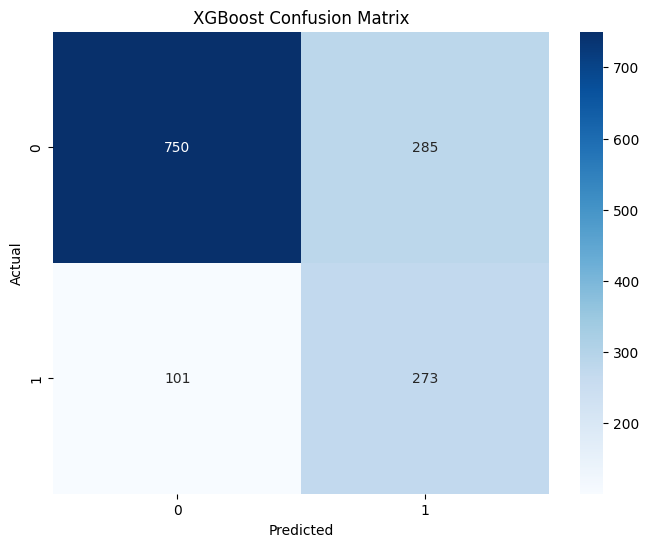

In [87]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plotting using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix for the last model for demonstration
y_pred = xgb.predict(X_test_transformed)
plot_confusion_matrix(y_test, y_pred, title='XGBoost Confusion Matrix')

The results from the XGBoost classifier with varying **`scale_pos_weight`** values provide insightful metrics on accuracy, recall, ROC-AUC score, and precision. Here's a detailed analysis:

**Accuracy:**

- The highest accuracy (76.37%) occurs at **`scale_pos_weight: 1`**.
- As **`scale_pos_weight`** increases, there's a gradual decline in accuracy, dropping to the lowest (72.60%) at **`scale_pos_weight: 5`**.
- This trend suggests that placing more emphasis on the minority class (churners) slightly compromises overall accuracy.

**Recall:**

- There's a significant improvement in recall with increased **`scale_pos_weight`**, starting from 48.40% at **`scale_pos_weight: 1`** and reaching 72.99% at **`scale_pos_weight: 5`**.
- Higher recall values indicate the model's enhanced ability to correctly identify actual churn cases, especially as the weight increases.

**ROC-AUC Score:**

- The ROC-AUC score improves as **`scale_pos_weight`** increases, with the highest value (72.73%) at **`scale_pos_weight: 5`**.
- This improvement signifies better model performance in distinguishing between churn and non-churn cases as the emphasis on the minority class increases.

**Precision:**

- Precision decreases from 56.39% to 48.92% as **`scale_pos_weight`** increases.
- The decline in precision at higher **`scale_pos_weight`** values suggests that while the model becomes more adept at identifying churn cases, it also starts to mistakenly label more non-churners as churners.

**Confusion Matrix (at `scale_pos_weight: 5`):**

- The confusion matrix shows 750 true negatives (TN), 285 false positives (FP), 101 false negatives (FN), and 273 true positives (TP).
- The high number of false positives and improved true positives indicate the model's tendency to predict more positive (churn) cases, which is in line with the increased recall.

**Conclusion of Iteration-1:**

- Increasing **`scale_pos_weight`** makes the model more sensitive to the positive class (churners), as evidenced by the rising recall and declining precision.
- There's a clear trade-off between recall and precision: higher weights improve the model's capability to detect churn cases but also increase the likelihood of false positives.
- The choice of **`scale_pos_weight`** should align with the business objectives: prioritizing capturing as many churners as possible (favoring high recall) versus ensuring the accuracy of churn predictions (favoring high precision).
- These results offer guidance on finding the optimal balance between accurately predicting churn cases and avoiding the misclassification of non-churn cases, depending on specific business needs and priorities.

### Iteration-2: Using Class_weight="balanced" in addition to  scale_pos_weight

The scale_pos_weight parameter in models like XGBoost and CatBoost specifically helps in adjusting the importance given to different classes. It's particularly useful for significantly imbalanced datasets. On the other hand, the class_weight parameter allows adjustment of the weights for different classes. In imbalanced datasets, this is crucial for ensuring that minority classes are not overlooked. Setting class_weight="balanced" automatically adjusts weights inversely proportional to class frequencies in the input data.

Using both class_weight="balanced" and scale_pos_weight aims to further enhance the model's sensitivity towards the minority class. This approach is expected to increase recall (catching more true positive cases) but might decrease precision (increasing false positives).

In [91]:
# Use df_base for features and target
X = df_base.drop('Churn', axis=1)
y = df_base['Churn']

# Define the transformer with OneHotEncoder for categorical variables and StandardScaler for numerical variables
transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_cols),
    ('num', StandardScaler(), num_cols)
], remainder='passthrough')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# Define the models
models = [
    ("LR", LogisticRegression(class_weight="balanced")),
    ("XGB", XGBClassifier(eval_metric='mlogloss', scale_pos_weight=5)),
    ("LGBM", LGBMClassifier(verbose=-1, class_weight="balanced")),
    ("CatBoost", CatBoostClassifier(scale_pos_weight=5, verbose=False))
]

# Classification reports
for name, model in models:
    pipe = Pipeline([("transformer", transformer), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))


Classification Report for LR:

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409

Classification Report for XGB:

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1035
           1       0.49      0.71      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409

Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1035
           1       0.50      0.73      0.59       374

    accuracy                           0.73      1409
   macro avg       0.69      0.7

1. **Logistic Regression (LR)**:
    - **Precision**: Moderate for churn prediction (0.49), indicating about half of the churn predictions are correct.
    - **Recall**: High (0.78), signifying effective identification of actual churn cases.
    - **F1-Score**: Balances precision and recall well at 0.60.
    - **Accuracy**: Overall accuracy of 0.72, decent but influenced by the model's effectiveness in identifying non-churn cases.
2. **XGBoost (XGB)**:
    - **Precision**: Similar to LR (0.49), indicating moderate accuracy in predicting churn.
    - **Recall**: Slightly lower (0.71) compared to LR, but still effective at identifying churn cases.
    - **F1-Score**: Comparable to LR at 0.58, indicating a similar balance between precision and recall.
    - **Accuracy**: Overall accuracy of 0.73, similar to LR.
3. **LightGBM (LGBM)**:
    - **Precision**: Slightly higher (0.50) compared to LR and XGB, suggesting a marginal improvement in churn prediction.
    - **Recall**: Comparable to XGB (0.73), effectively identifying most churn cases.
    - **F1-Score**: Slightly better at 0.59, reflecting a modest improvement in balancing precision and recall.
    - **Accuracy**: Slightly higher overall accuracy (0.73) compared to LR and XGB.
4. **CatBoost**:
    - **Precision**: Lower (0.45) compared to other models, indicating more false positives in churn prediction.
    - **Recall**: High (0.79), excellent at identifying actual churn cases.
    - **F1-Score**: Comparable to other models at 0.58.
    - **Accuracy**: Slightly lower overall accuracy (0.69) compared to other models.

**Conclusion for Iteration-2:**

- All models exhibit high recall for churn (class 1), which is essential for churn prediction models to correctly identify as many actual churn cases as possible.
- Precision for churn prediction is moderate across all models. This trade-off leads to a higher number of false positives, where non-churn cases are often mislabeled as churn.
- The f1-scores are fairly consistent across all models, indicating a balanced compromise between precision and recall.
- The overall accuracy of the models ranges from 0.69 to 0.73. They perform reasonably well in distinguishing between churn and non-churn cases, but there's room for improvement in reducing false positives.

## Model Evaluation, Selection and Hyperparameter Optimization

Selecting a model for hyperparameter optimization depends on our primary goal and the specific context of the problem. Considering the classification reports for Logistic Regression (LR), XGBoost (XGB), LightGBM (LGBM), and CatBoost, let's analyze each model's suitability based on their performance metrics:

1. **Recall for Class 1 (Churn)**:
    - High recall is indeed critical in churn prediction to minimize the risk of missing actual churn cases.
    - CatBoost shows the highest recall, making it a strong candidate if this metric is prioritized.
2. **Precision for Class 1 (Churn)**:
    - LightGBM's slightly higher precision is an advantage if the goal is to reduce false positives while maintaining good recall.
3. **F1-Score for Class 1 (Churn)**:
    - The similar f1-scores across models suggest that all are reasonably balanced in terms of precision and recall.
    - LightGBM slightly leading in f1-score indicates a marginally better balance.
4. **Overall Accuracy**:
    - While overall accuracy is important, in the context of churn prediction, the specific focus on churn (class 1) often takes precedence.

### **Model Selection for Hyperparameter Optimization**:

- **LightGBM (LGBM)**:
    - Pros: Efficient, slightly higher precision and f1-score, highest overall accuracy.
    - Cons: Slightly lower recall compared to CatBoost.
    - Good choice if looking for a balance across all metrics.
- **CatBoost**:
    - Pros: Highest recall, very beneficial for minimizing missed churn cases.
    - Cons: Lower precision, leading to more false positives.
    - Suitable if the primary focus is on maximizing recall.
- **Logistic Regression (LR)**:
    - Pros: Good balance, simpler and more interpretable.
    - Cons: May not capture complex patterns as effectively as tree-based models.
    - A viable option if model interpretability is a key requirement.
- **XGBoost (XGB)**:
    - Pros: Good balance, versatile.
    - Cons: Slightly lower performance in this scenario.
    - Could be considered for its versatility and overall balance.

### **Recommendation:**

Given the context of churn prediction where identifying actual churn cases is crucial (high recall), and considering the overall balance between precision, recall, and accuracy, **LightGBM (LGBM)** appears to be a strong candidate for hyperparameter optimization. It provides a slightly better balance across the key metrics and is efficient in handling large and complex datasets. However, if we were told that primary focus is on maximizing recall to ensure minimal missed churn cases, ywe would have considered **CatBoost** for optimization, despite its slightly lower precision.

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__min_child_samples': 10, 'model__n_estimators': 100, 'model__subsample': 0.7}


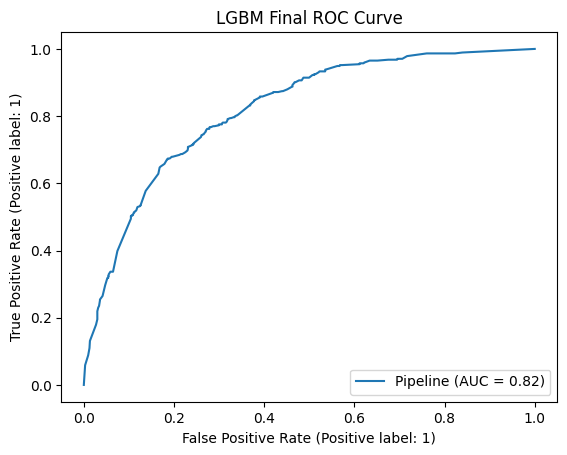

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74      1035
           1       0.45      0.85      0.59       374

    accuracy                           0.68      1409
   macro avg       0.68      0.73      0.66      1409
weighted avg       0.79      0.68      0.70      1409



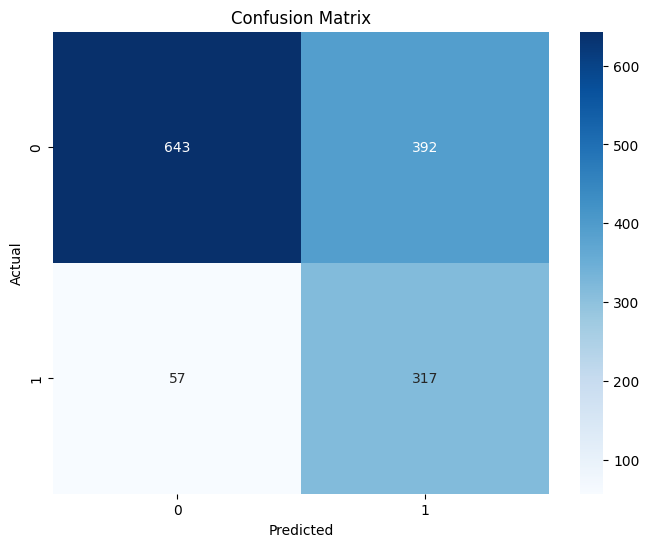

Cross-validation Recall Scores: [0.81939799 0.86622074 0.80602007 0.87959866 0.8729097 ]
Mean Recall Score: 0.8488294314381271


In [94]:
# Extract the LightGBM pipeline
pipe_lgbm = Pipeline([
    ("transformer", transformer),
    ("model", LGBMClassifier(verbose=-1, class_weight="balanced"))
])

# Define hyperparameters for GridSearchCV
lightgbm_params = {
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__n_estimators": [100, 300, 500, 1000],
    "model__colsample_bytree": [0.7, 1],
    "model__max_depth": [-1, 2, 4, 8],
    "model__min_child_samples": [10, 20, 30],
    "model__subsample": [0.7, 0.8, 1]
}

# Grid search with cross-validation
gs_lgbm = GridSearchCV(pipe_lgbm, lightgbm_params, cv=kfold, scoring="recall", n_jobs=-1, verbose=2)
gs_lgbm.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", gs_lgbm.best_params_)

# Fit the model with best parameters
lgbm_final = pipe_lgbm.set_params(**gs_lgbm.best_params_).fit(X_train, y_train)

# Prediction and Evaluation
y_pred_final = lgbm_final.predict(X_test)

# ROC Curve
RocCurveDisplay.from_estimator(lgbm_final, X_test, y_test)
plt.title("LGBM Final ROC Curve")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_final))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_final)  # Ensure plot_confusion_matrix is defined

# Cross-validation recall score
cv_result = cross_val_score(lgbm_final, X_train, y_train, cv=kfold, scoring="recall")
print("Cross-validation Recall Scores:", cv_result)
print("Mean Recall Score:", cv_result.mean())


In the code, several steps were taken to optimize the LightGBM model for churn prediction. Here's a breakdown of what was done:

1. **Grid Search with Cross-Validation**:
    - The **`GridSearchCV`** process was used to explore a range of hyperparameters for the LightGBM model. This included combinations of learning rate, number of estimators, **`colsample_bytree`**, **`max_depth`**, **`min_child_samples`**, and **`subsample`**.
    - The model was evaluated across 5 different folds of the data (**`kfold`**), with a total of 864 different combinations (**`4320 fits`**).
2. **Best Hyperparameters**:
    - The best performing set of parameters was identified: **`colsample_bytree: 0.7`**, **`learning_rate: 0.01`**, **`max_depth: 2`**, **`min_child_samples: 10`**, **`n_estimators: 100`**, and **`subsample: 0.7`**.
3. **Final Model Performance**:
    - The LightGBM model was then fitted with these best parameters.
    - The classification report shows the performance of this optimized model on the test data:
        - Precision for the non-churn class (0) is high (0.92), but lower for the churn class (1) at 0.45.
        - Recall is high for the churn class (0.85) but lower for the non-churn class (0.62). This indicates the model is very effective at identifying churn cases but at the cost of misclassifying some non-churn cases.
        - The overall accuracy of the model is 0.68, and the weighted average F1-score is 0.70, considering the imbalance in the dataset.
    - Cross-validation on the training data resulted in a mean recall score of approximately 0.849, indicating consistently high performance in identifying churn cases across different subsets of the data.

### **Comment on Results and Final Verdict:**

- **Strengths**: The model excels in recall for the churn class, making it highly effective at identifying potential churn cases. This is crucial in scenarios where missing churn cases could be more detrimental than false alarms.
- **Weaknesses**: The precision for the churn class is moderate, which means the model tends to mislabel a significant number of non-churners as churners. This could lead to unnecessary churn prevention efforts being directed at customers who were not at risk of churning.
- **Trade-offs**: The high recall comes at the expense of precision, a common trade-off in classification tasks, especially with imbalanced data.
- **Business Implications**: The suitability of this model depends on the business context. If the primary goal is to capture as many churn cases as possible, this model is very effective. However, if the cost of false positives (incorrectly predicting churn) is high, the business might want to consider adjusting the model or its threshold to balance precision and recall better.

**Final Verdict**: The LightGBM model, with its current hyperparameter settings, is a robust solution for churn prediction, especially in contexts where high recall is prioritized. However, if reducing false positives is equally important, further model tuning or exploring other models might be necessary.

## Deployement Strategy and Other Recommendations

Given the insights from the LightGBM churn prediction model, which demonstrates a high recall but moderate precision, the business can implement several targeted strategies to effectively reduce churn. These strategies need to balance the aggressiveness of churn prevention measures with the cost of potentially targeting non-churning customers. Here's a detailed and professional plan:

1. **Segmented Customer Outreach**:
    - **High-Risk Customers**: For customers identified by the model as high-risk for churn, deploy personalized marketing campaigns. This can include special offers, discounts, or loyalty program incentives tailored to their usage patterns and preferences.
    - **Moderate-Risk Customers**: For this group, softer engagement strategies like satisfaction surveys or personalized newsletters can be effective. This approach ensures engagement without overwhelming the customer.
2. **Tailored Service Packages**:
    - Analyze the usage data of customers predicted to churn and offer customized service packages or upgrades that align with their usage patterns. For example, if a customer is frequently exceeding their data limit, offer a plan with higher data capacity at a promotional rate.
    - Implement a 'Customer Lifetime Value' model to identify high-value customers at churn risk and offer them premium service packages or exclusive benefits.
3. **Proactive Customer Support Interventions**:
    - Initiate proactive support for customers identified as churn risks, such as preemptive service checks, courtesy calls for feedback, or offering assistance with any issues they may have faced in the past.
    - Use customer interaction data to understand common issues faced by churn-risk customers and address these proactively.
4. **Personalized Communication**:
    - Utilize customer data to personalize communication. Address customers by name and reference their specific interests or past interactions with the company in emails, messages, and calls.
    - Develop communication strategies based on customer preferences – some may respond better to emails, others to text messages or phone calls.
5. **Loyalty and Retention Programs**:
    - Implement or enhance loyalty programs, offering rewards for continued service or bonuses for specific milestones.
    - Consider 'win-back' offers for customers who have already decided to leave, such as discounted rates or enhanced service features.
6. **Feedback Loops**:
    - Regularly gather feedback from customers, especially those identified as churn risks, to understand their concerns and reasons for potential dissatisfaction.
    - Use this feedback to make continuous improvements in service quality, customer support, and overall customer experience.
7. **Dynamic Pricing Models**:
    - Consider dynamic pricing models where feasible, offering special rates to customers who are likely to churn. Ensure this is done tactically to avoid setting a precedent where customers expect discounts continually.
8. **Customer Experience Enhancement**:
    - Invest in improving the overall customer experience. This includes streamlining the user interface, reducing wait times for support, and ensuring high service quality.
    - Regularly update customers about new features, services, or improvements made based on customer feedback.
9. **Employee Training**:
    - Train customer-facing employees to recognize signs of customer dissatisfaction and empower them to offer immediate resolutions or escalate issues appropriately.

**Monitoring and Adjusting Strategies**:

- Continuously monitor the effectiveness of these strategies through key metrics like retention rates, customer satisfaction scores, and feedback.
- Adjust strategies as needed based on ongoing data analysis and changing customer behaviors or market trends.

By implementing these strategies, the telecom business can proactively address potential churn, enhancing customer retention and satisfaction. Remember, the goal is to create a positive and engaging customer experience, which is a critical factor in reducing churn.